[View in Colaboratory](https://colab.research.google.com/github/lnarasimhan83/anzdemo/blob/master/Devanagari.ipynb)

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
from scipy.misc import imread, imsave, imresize
from google.colab import files
import numpy as np
def upload_files():
  
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [5]:
list1 = upload_files()
print (list1)
train_file = list1[0]

Saving Swara_all_train.csv to Swara_all_train.csv
['Swara_all_train.csv']


In [6]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)
#print (x_train[3])

[255 255 255 249 255 240 255 255 248 230 196 133 117 124 120  25  33  59
  96  39   1  12   0   2  44 133 218 237 244 251 255 244 255 255 218 150
 157 127  43   0  11   8  16  22  10   4  25  19   0  16  36  32  12   3
 113 244 255 255 255 242 254 255 144  39   4  14  32  83  95 101 119 126
 149 155 165 190 189 183 192 173 145  34  58 224 255 246 254 250 248 243
  98   3  39 114 188 246 227 246 255 242 244 245 239 248 255 253 247 255
 239 150  60 151 246 243 255 255 251 238  91   0 138 246 255 250 245 252
 239 248 229 152 190 245 255 255 249 255 252 254 171 205 255 255 255 247
 249 253 156  74 186 242 244 248 255 253 249 255 199  25 112 252 252 254
 252 242 245 255 237 255 249 250 251 238 255 255 243 207 252 246 251 255
 250 217 231 233 183   6  60 217 243 243 255 254 255 245 247 255 255 254
 255 255 255 231 248 255 238 255 238 213 203 103  71  99 110  25  46 192
 255 248 247 252 253 252 255 251 252 255 251 255 255 240 250 253 249 224
 140  64  43  23   5  19  15   0  52 195 255 244 24

Text(0.5,1,'28x28 data')

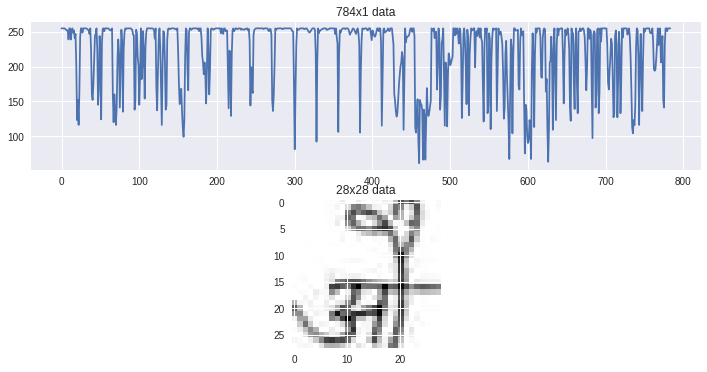

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [0]:
#x_train = x_train.reshape(-1, 28, 28, 1)
#x_val = x_val.reshape(-1, 28, 28, 1)  
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_val = x_val.reshape(x_val.shape[0], 28, 28,1)

In [0]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.
#print (x_train[3])

In [11]:
y_train[:1]

array([9])

In [12]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#y_train = np_utils.to_categorical(y_train, 10)
#y_val = np_utils.to_categorical(y_val, 10)
#example:
print(y_train[:9])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [13]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 5,5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(12, 4 ))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5), activation="relu")`
  import sys


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        2890      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 10)          2510      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 12)          1932      
_________________________________________________________________
flatten_1 (Flatten)          (None, 12)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
2106/2106 [==============================] - 2s 1ms/step - loss: 2.4850 - acc: 0.0874
Epoch 2/10
2106/2106 [==============================] - 1s 320us/step - loss: 2.4845 - acc: 0.0931
Epoch 3/10
2106/2106 [==============================] - 1s 313us/step - loss: 2.4843 - acc: 0.0874
Epoch 4/10
2106/2106 [==============================] - 1s 321us/step - loss: 2.4841 - acc: 0.0954
Epoch 5/10
2106/2106 [==============================] - 1s 314us/step - loss: 2.4839 - acc: 0.0954
Epoch 6/10
2106/2106 [==============================] - 1s 315us/step - loss: 2.4837 - acc: 0.0954
Epoch 7/10
2106/2106 [==============================] - 1s 316us/step - loss: 2.4836 - acc: 0.0954
Epoch 8/10
2106/2106 [==============================] - 1s 322us/step - loss: 2.4834 - acc: 0.0954
Epoch 9/10
2106/2106 [==============================] - 1s 318us/step - loss: 2.4834 - acc: 0.0954
Epoch 10/10
2106/2106 [==============================] - 1s 324us/step - loss: 2.4834 - acc: 0.0954


In [0]:
score = model.evaluate(x_val, y_val, verbose=0)

In [20]:
print(score)

[2.4867201074640803, 0.0851063829787234]


In [0]:
y_pred = model.predict(x_val)

In [24]:
print(y_pred[:9])
print(y_val[:9])

[[0.07975947 0.08156671 0.09150466 0.08059781 0.08328757 0.08145164
  0.08152288 0.0813722  0.08058587 0.08508115 0.08318496 0.09008516]
 [0.07975947 0.08156671 0.09150466 0.08059781 0.08328757 0.08145164
  0.08152288 0.0813722  0.08058587 0.08508115 0.08318496 0.09008516]
 [0.07975947 0.08156671 0.09150466 0.08059781 0.08328757 0.08145164
  0.08152288 0.0813722  0.08058587 0.08508115 0.08318496 0.09008516]
 [0.07975947 0.08156671 0.09150466 0.08059781 0.08328757 0.08145164
  0.08152288 0.0813722  0.08058587 0.08508115 0.08318496 0.09008516]
 [0.07975947 0.08156671 0.09150466 0.08059781 0.08328757 0.08145164
  0.08152288 0.0813722  0.08058587 0.08508115 0.08318496 0.09008516]
 [0.07975947 0.08156671 0.09150466 0.08059781 0.08328757 0.08145164
  0.08152288 0.0813722  0.08058587 0.08508115 0.08318496 0.09008516]
 [0.07975947 0.08156671 0.09150466 0.08059781 0.08328757 0.08145164
  0.08152288 0.0813722  0.08058587 0.08508115 0.08318496 0.09008516]
 [0.07975947 0.08156671 0.09150466 0.0805

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

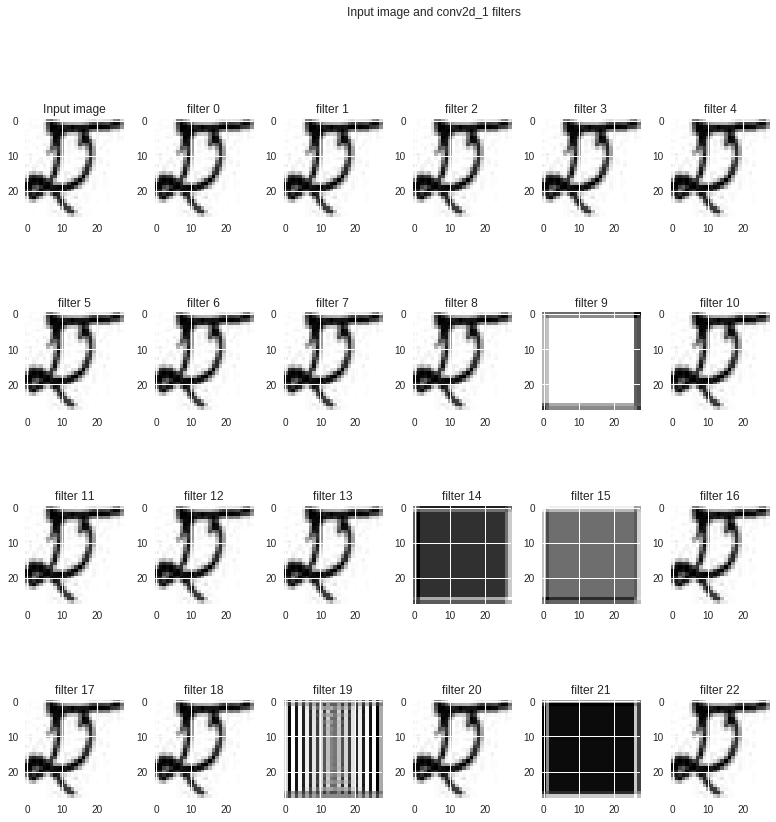

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(x_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()